## <center>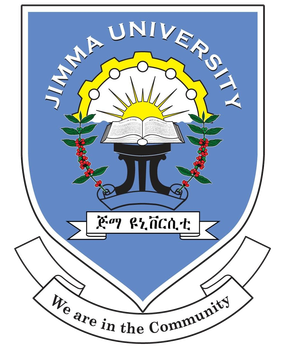


</center>

## <center>**JIMMA UNIVERSITY**</center>

## <center> **JIMMA INSTITUTE OF TECHNOLOGY**</center>

## <center> **FACULTY OF ELECTRICAL AND COMPUTER ENGINEERING**</center>

## <center> **STREAM OF COMPUTER ENGINEERING**</center>

## <center>**RESEARCH ON ETHIOPIAN LANGUAGE KEYWORD SPOTING**</center>




<a id="project"></a>
## <center>1. Project Description</center>

This is a project to detect the 20 following 2-3 second criminal voice sampled at 16kHz :
Eserat , Agtew, Dferat, Tlefat , Reshinachew , Tsetargew, Forjid , Shibr , Gejera , Ets , Gubo , Zrefew , Refrfew , Dfaw , Selilew , Musina , Zelzlew , Afendaw , Agayew.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Zerirew.

##List of Contributors on preparing Dataset from Electrical and Computer Engineering Student are 


1.   Abel Yohannes
2.   Abel Demis
3.   Abubaker Zerihun
4.   Adem Seid
5.   Frehiwot Asres
6.   Hilina 
7.   Eshcol
8.   Ikram Alkedir
9.   Jerusalem
10.  Abdi Abate
11.   Jerusalem
12.  Tsega
13.  Frezer
14.  Gadise
15.  Ba
16.  Nahom Diro
17. Ruth Alemalew




--- Special thanks to Adane T. for introducing this idea to us.


<a id="Installation"></a>
### Import and Install Dependencies



In [ ]:
!pip install tensorflow-io matplotlib pydub tf2onnx onnxmltools gdown onnxruntime

<a id="Dataset"></a>
### Download Dataset

In [ ]:
import gdown
# Define the file or folder ID and URL

TEST_ID = '1flM5WR_YINDdyBZq3W8F6c9Gw5ymkwrD'
TRAIN_ID = '1UXB7y7B3OHZPlP8bhYhgD96YdacpWxJ_'
UTILS_ID = '1MWRGS9fMdvHIg_MANoMZKgfA5Aw0npBR'

TEST_FILE = 'https://drive.google.com/uc?/export=dowmload&id='+  TEST_ID 
TRAIN_FILE = 'https://drive.google.com/uc?/export=dowmload&id='+ TRAIN_ID 
UTILS_FILE = 'https://drive.google.com/uc?/export=dowmload&id='+ UTILS_ID 


# Define the destination path
dest_path = '/content/'

# Download the file or folder from the URL to the destination path
# gdown.download(TEST_FILE, dest_path, quiet=False)
gdown.download(TRAIN_FILE, dest_path, quiet=False)
gdown.download(UTILS_FILE, dest_path, quiet=False)
print('File or folder downloaded successfully!')

In [ ]:
!mkdir test
!unzip /content/test_5000.zip -d /content/test
!mkdir train
!unzip /content/train.zip -d /content/


<a id="eda"></a>
## <center>2. Exploratory Data Analysis</center>

<a id="distribution"></a>
### Distribution of Categories

Load Dataset and visualized how many times each utterance is present in the data. using the following code:

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import tensorflow as tf
import librosa

In [ ]:
import random
from scipy.io import wavfile
execfile("/content/utils.py")


In [ ]:
# Loading all the waves and labels
train_directory = 'train/audio/'
train_labels = []
train_samples = []

for trains in os.listdir(train_directory):
    if trains == '_background_noise_':
        continue
    for wav_file in os.listdir(os.path.join(train_directory, trains)):
        if wav_file[-4:] != '.wav':
            continue
        sample_rate, sample = wavfile.read(os.path.join(os.path.join(train_directory, trains), wav_file))
        train_labels.append(trains)
        train_samples.append((sample))

In [ ]:
len(train_samples)

### Checking Dataset with Spectogram
### Log Spectrogram

we show how an audio recording can be transformed into a feature representation that reveals the distribution of the signal's energy across the different pitches. Such features can be obtained from a spectrogram by converting the linear frequency axis (measured in Hertz) into a logarithmic axis (measured in pitches). The resulting representation is also called log-frequency spectrogram.


### MS-LFB Frequency Filter Banks

The idea of Mel-Scaling is that the human ear can hear different frequency resolutions at different frequencies. In other words, we are more sensitive to the lower range of our hearing range as compared to its higher frequencies. So a scaling method is developed to change the frequencies to Mel_Scale which is based on having the same human ear resolution at all scales. The formula used to convert the frequency in Hz to Mel-Scale are the following: 

m = 2959 * log10 ( 1 + freq / 700)


In [ ]:
import IPython.display as ipd

num=3572

freqs, times, spectrogram = log_specgram(train_samples[num], sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title(f'Raw wave of {train_labels[num]} utterance')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(train_samples[0]), sample_rate), train_samples[0])
ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title(f'Spectrogram of {train_labels[num]} utterance')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

print(f'Voice Label : {train_labels[num]} utterance')
ipd.Audio(train_samples[num], rate=16000)

### Data Distribution

In [ ]:
train_pd = pd.DataFrame({'label':train_labels})
fig, axis = plt.subplots(figsize=(10, 8))
sns.countplot(ax=axis, x="label", data=train_pd)
print(train_pd.label.unique())
plt.show()

### Determine Average Length of a Criminal Word


### Calculate Mean, Min and Max

## <center>3. Build Preprocessing Function</center>

<a id="distribution"></a>
### Preprocess the data based on Dataset Statistical Data

Preprocessing data based on statistical data involves using statistical techniques to identify and handle outliers, missing values, and other anomalies in the dataset. By following these steps, Identify missing values , Identify outliers ,  Check for multicollinearity , Check for data distribution, Everyone can preprocess data based on statistical data and ensure that it is ready for analysis.

In [ ]:
train_directory = '/content/train/audio'
test_directory = '/content/test'
noise_directory ='/content/train/audio/_background_noise_'

In [ ]:
noise_coef = 0.1
silence_coef = 0.1
drop_out_rate = 0.5
num_epochs = 120
num_silences = 2200
audio_length = 16000
sample_rate = 16000

                                                                                                                                                      

classes = ['Eserat', 'Agtew', 'Dferat', 'Tlefat', 'Reshinachew', 'Tsetargew', 
           'Forjid' , 'Shibr' , 'Gejera' , 'Ets' , 'Gubo' , 'Zrefew' , 'Refrfew' , 
           'Dfaw' , 'Selilew' , 'Musina' , 'Zelzlew' , 'Afendaw' , 'Agayew', 'Zerirew' ,'Unknown' , 'Silence']


###Check Audio there in the path                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Zerirew.

In [ ]:
ipd.Audio(train_directory + r'/Eserat/Eserat01.wav', rate=16000) 

## Preprocessing Dataset and 

In [ ]:
# To hold waves as xs and labels as y of training
train_samples = []
train_labels = []
noise_samples = []
for noises in os.listdir(noise_directory):
    if noises[-4:] != '.wav':
        continue
    noise_sample_rate, noise_sample = wavfile.read(os.path.join(noise_directory, noises))
    #noise_resampled = librosa.resample(noise_sample.astype(np.float), orig_sr=noise_sample_rate, target_sr=sample_rate)
    noise_resampled = noise_sample
    noise_samples.append(noise_resampled)

# Loading all the waves and labels
for trains in os.listdir(train_directory):
    if trains == '_background_noise_':
        continue
    for wav_file in os.listdir(os.path.join(train_directory, trains)):
        if wav_file[-4:] != '.wav':
            continue
        sample_rate_init, sample = wavfile.read(os.path.join(os.path.join(train_directory, trains), wav_file))
        signal_resampled = sample
        #signal_resampled = librosa.resample(sample.astype(np.float), orig_sr=sample_rate_init, target_sr=sample_rate)
        if len(signal_resampled) != audio_length:
            zeros_needed = audio_length - len(signal_resampled)
            signal_resampled = np.append(signal_resampled, np.zeros((zeros_needed))) # if the length is not right just pad with zeros
        #adding noise to the samples
        nois_type_indx = np.random.randint(0, len(noise_samples), 1)
        nois_sample_indx = np.random.randint(0, len(noise_samples[int(nois_type_indx)]) - audio_length, 1)
        sample_noise = signal_resampled + noise_coef * noise_samples[int(nois_type_indx)][int(nois_sample_indx):int(nois_sample_indx) + audio_length]
        train_samples.append(sample_noise)
        if trains not in ['Eserat', 'Agtew', 'Dferat', 'Tlefat', 'Reshinachew', 'Tsetargew', 
           'Forjid' , 'Shibr' , 'Gejera' , 'Ets' , 'Gubo' , 'Zrefew' , 'Refrfew' , 
           'Dfaw' , 'Selilew' , 'Musina' , 'Zelzlew' , 'Afendaw' , 'Agayew' , 'Zerirew']:
            train_labels.append('Unknown')
        else:
            train_labels.append(trains)

<ipython-input-88-14644d554f6f>:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  noise_sample_rate, noise_sample = wavfile.read(os.path.join(noise_directory, noises))


### Adding portions of weakened background noise as silence

In [ ]:
# adding portions of weakened background noise as silence
for num_sil in range(num_silences):
    silence_type_indx = np.random.randint(0, len(noise_samples), 1)
    silence_sample_indx = np.random.randint(0, len(noise_samples[int(silence_type_indx)]) - audio_length, 1)
    sample_silence = silence_coef * noise_samples[int(silence_type_indx)][int(silence_sample_indx):int(silence_sample_indx) + audio_length]
    train_labels.append('Silence')
    train_samples.append(sample_silence)

In [ ]:
len(train_samples)

### Shuffle Dataset

In [ ]:
#temp = list(zip(train_samples, train_labels))
#random.shuffle(temp)
#train_samples, train_labels = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
#train_samples, train_labels = list(train_samples), list(train_labels)

<a id="eda"></a>
## <center>4. Load Tensorflow Dependencies And Construct Model </center>#
To construct a model using TensorFlow, you will need to define the architecture of your model using TensorFlow's API. This typically involves defining the layers of your model, specifying the input and output shapes, and setting the parameters for each layer.



In [ ]:
import numpy as np
from scipy.io import wavfile
import os
from sklearn.preprocessing import LabelEncoder
import keras
from sklearn.model_selection import train_test_split
import IPython.display as ipd
import keras.regularizers
import tensorflow as tf
from tensorflow.python.keras.utils.generic_utils import get_custom_objects
from tensorflow.keras.callbacks import LearningRateScheduler
from datetime import datetime
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
from scipy.fftpack import dct
import seaborn as sns
from tensorflow.keras.models import Model

In [ ]:
# converting labels from text to int
le = LabelEncoder()
y_all = le.fit_transform(train_labels)
y_all_hot = keras.utils.np_utils.to_categorical(y_all, len(le.classes_))
# To make sure all arrays are having a defined size
x_train, x_test, y_train_one_hot, y_test_one_hot = train_test_split(train_samples, y_all_hot, test_size=0.3)

In [ ]:
num = 31
print(f'Voice Label : {y_train_one_hot[num]} utterance')
ipd.Audio(x_train[num], rate=16000)

In [ ]:
x_train_mslfb = []
x_train_mfcc = []
for ind in range(len(x_train)):
    x_train_mslfb.append(MSLFB(x_train[ind]))
    x_train_mfcc.append(MFCC(x_train[ind]))

x_test_mslfb = []
x_test_mfcc = []
for ind in range(len(x_test)):
    x_test_mslfb.append(MSLFB(x_test[ind]))
    x_test_mfcc.append(MFCC(x_test[ind]))

In [ ]:
x_train_mslfb_reshaped = np.reshape(x_train_mslfb, (len(x_train_mslfb), len(x_train_mslfb[0]), len(x_train_mslfb[0][0]), 1))
x_test_mslfb_reshaped = np.reshape(x_test_mslfb, (len(x_test_mslfb), len(x_test_mslfb[0]), len(x_test_mslfb[0][0]), 1))
x_train_mfcc_reshaped = np.reshape(x_train_mfcc, (len(x_train_mfcc), len(x_train_mfcc[0]), len(x_train_mfcc[0][0]), 1))
x_test_mfcc_reshaped = np.reshape(x_test_mfcc, (len(x_test_mfcc), len(x_test_mfcc[0]), len(x_test_mfcc[0][0]), 1))

### Visualized Added Mathematical Silence Noise With Original Audio Dataset 

In [ ]:
print(f'Voice Label : {train_labels[num]} utterance')
ipd.Audio(train_samples[num], rate=16000)

### Visualized Audio and their Log Spectrogram

In [ ]:
num = 909

In [ ]:
freqs, times, spectrogram = log_specgram(x_train[num], sample_rate)
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title(f'Raw wave of {y_train_one_hot[num]} utterance')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, sample_rate/len(x_train[num]), sample_rate), x_train[num])


ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title(f'Spectrogram of {y_train_one_hot[num]} utterance')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

### Visualized MSLFB and MCFF features

In [ ]:
#Plot MCFF features
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title(f'Spectrogram MCFF of {train_labels[num]} utterance')
ax1.set_ylabel('Freqs in Hz')
ax1.imshow(x_train_mfcc[num], aspect='auto', origin='lower')

#Plot MSLFB features
ax2 = fig.add_subplot(212)
ax2.imshow(x_train_mslfb[num], aspect='auto', origin='lower')
ax2.set_title(f'Spectrogram MSLFB of {train_labels[num]} utterance')
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

### Shape of MSLFB and MCFF ready to be trained

In [ ]:
x_train_mslfb_reshaped.shape

In [ ]:
x_test_mslfb_reshaped.shape

In [ ]:
y_train_one_hot.shape

## Build Sequential Model, Compile and View Summary

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D , BatchNormalization , MaxPooling2D , Dropout , Flatten , Dense , Input , Concatenate
from tensorflow.keras.models import Model
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
lr_sched = step_decay_schedule(initial_lr=0.0001, decay_factor=0.97, step_size=5)
cb_earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.003, patience=30, mode='max')

In [ ]:
#Creating the model

def create_model():

  model_mfcc = Sequential()
  model_mslfb = Sequential()

  model_mfcc.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides = (1,1), input_shape=(x_train_mfcc_reshaped.shape[1], x_train_mfcc_reshaped.shape[2], 1)))
  model_mfcc.add(BatchNormalization())
  model_mfcc.add(Dropout(0.25))
  model_mfcc.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)))

  model_mfcc.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', strides = (1,1)))
  model_mfcc.add(BatchNormalization())
  model_mfcc.add(Dropout(0.25))
  model_mfcc.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)))

  model_mfcc.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', strides = (1,1)))
  model_mfcc.add(BatchNormalization())
  model_mfcc.add(Dropout(0.25))
  model_mfcc.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)))
  
  model_mslfb.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', strides = (1,1) , input_shape=(x_train_mslfb_reshaped.shape[1], x_train_mslfb_reshaped.shape[2], 1)))
  model_mslfb.add(BatchNormalization())
  model_mslfb.add(Dropout(0.25))
  model_mslfb.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)))

  model_mslfb.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', strides = (1,1)))
  model_mslfb.add(BatchNormalization())
  model_mslfb.add(Dropout(0.25))
  model_mslfb.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)))

  model_mslfb.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', strides = (1,1)))
  model_mslfb.add(BatchNormalization())
  model_mslfb.add(Dropout(0.25))
  model_mslfb.add(MaxPooling2D(pool_size=(2,2) , strides = (2,2)))

  flatten1 = Flatten()(model_mfcc.output)
  flatten2 = Flatten()(model_mslfb.output)

  merged = Concatenate()([flatten1 , flatten2])
  dense_layer = Dense(512, activation='relu')(merged)
  dense_layer = Dropout(0.5)(dense_layer)
  dense_layer = Dense(256, activation='relu')(dense_layer)
  dense_layer = Dropout(0.5)(dense_layer)
  output = Dense(22, activation='softmax')(dense_layer)
  model = Model(inputs=[model_mfcc.input, model_mslfb.input], outputs=output)
  return model


In [ ]:
model = create_model()

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

## Fit Model, View Loss 

In [ ]:
hist = model.fit([x_train_mfcc_reshaped, x_train_mslfb_reshaped], y_train_one_hot, batch_size=32, epochs=100, callbacks=[lr_sched, cb_earlystop], validation_data=([x_test_mfcc_reshaped, x_test_mslfb_reshaped], y_test_one_hot), verbose=1)

### History of Model and Train/Validation Results

In [ ]:
file_date = datetime.now().strftime("%Y%m%d_%H%M%S")

In [ ]:
# Plotting the loss vs epoch
loss_train = hist.history['loss'][0:]
loss_val = hist.history['val_loss'][0:]
epochs = range(1, len(hist.epoch) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Ensemble MSLFB and MFCC loss ' + file_date)# Training and Validation
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy vs epoch
train_accuracy = hist.history['accuracy'][0:]
val_accuracy = hist.history['val_accuracy'][0:]
epochs = range(1, len(hist.epoch) + 1)
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Ensemble MSLFB and MFCC Accuracy ' + file_date)#Training and Validation
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
pd.DataFrame(hist.history).plot(title="Train and validation results",figsize=(10,7));

### Evaluating model on test data

In [ ]:
loss, accuracy = model.evaluate([x_test_mfcc_reshaped, x_test_mslfb_reshaped], y_test_one_hot)
print('Test accuracy:' , accuracy * 100,'%')

In [ ]:
correct_pred = 0
inc_pred = 0
for val_ind in range(10000):
    rand_ind = np.random.randint(0, len(x_test), 1)
    if np.argmax(y_test_one_hot[rand_ind]) == 9 or np.argmax(y_test_one_hot[rand_ind]) == 7:
        continue
    prediction = model.predict([x_test_mfcc_reshaped, x_test_mslfb_reshaped])
    if np.argmax(prediction) == np.argmax(y_test_one_hot[rand_ind]):
        correct_pred += 1
    else:
        inc_pred += 1
print('Percent correct of known words', correct_pred / (correct_pred + inc_pred) * 100)

### Confusion Matrix

In [ ]:
#Create label names
label_names = ['Eserat', 'Agtew', 'Dferat', 'Tlefat', 'Reshinachew', 'Tsetargew', 
           'Forjid' , 'Shibr' , 'Gejera' , 'Ets' , 'Gubo' , 'Zrefew' , 'Refrfew' , 
           'Dfaw' , 'Selilew' , 'Musina' , 'Zelzlew' , 'Afendaw' , 'Agayew' , 
           'Zerirew' ,'Unknown' , 'Silence']

In [ ]:
y_probs = model.predict([x_test_mfcc_reshaped, x_test_mslfb_reshaped])
print(y_probs[0])
#Convert prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)
print(y_preds[0])

131/131 [==============================] - 1s 4ms/step
[1.2513404e-03 9.5266664e-01 2.4919730e-02 5.2243355e-05 2.0201566e-02
 9.0844103e-04]
1


In [ ]:
test_labels = []
for index in range(len(y_test_one_hot)):
  test_labels.append(np.argmax(y_test_one_hot[index])) 

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_preds,test_labels)
#Plot
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=label_names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

### Save and Change Model to ONNX

In [ ]:
model.save("asb_ensemble.h5")

In [ ]:
from tensorflow.python.keras.models import load_model
import onnxmltools
import tf2onnx

In [ ]:
# Load the TensorFlow model
model_h5 = tf.keras.models.load_model("/content/asb_ensemble.h5")

# Convert the TensorFlow model to ONNX format
onnx_model, _ = tf2onnx.convert.from_keras(model)

In [ ]:
# Save the ONNX model
with open('asb_ensemble.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())

### Run Inference on Model Using Sample Audio

In [ ]:
import onnxruntime

path = ""
model_name = ""
SAMPLING_RATE = 16000
sess = onnxruntime.InferenceSession(model_name)
sample_rate_init, audio_data_test = wavfile.read(path)

freqs, times, _spectrogram = log_specgram(audio_data_test, SAMPLING_RATE)
msLFB_spec = MSLFB(_spectrogram)
mcff_spec = MFCC(_spectrogram)
# Assume x_new_mfcc and x_new_mslfb are the new input data
x_new_mfcc_reshaped_spec = np.reshape(mcff_spec, (1, mcff_spec.shape[0], mcff_spec.shape[1], 1)).astype(np.float32)
x_new_mslfb_reshaped_spec = np.reshape(msLFB_spec, (1, msLFB_spec.shape[0], msLFB_spec.shape[1], 1)).astype(np.float32)

# Make predictions on new data
# Prepare the input data
input_data = {'conv2d_input': x_new_mfcc_reshaped_spec, 'conv2d_3_input': x_new_mslfb_reshaped_spec}
# Run the prediction
y_probs = sess.run(None, input_data)
# Convert the output to class predictions
y_preds = y_probs[0].argmax(axis=1)
print("Predicted class on : ", label_names[y_preds[0]])


<a id="conclusion"></a>
## <center>6. Results and Conclusion</center>

Ensemble model can improve the accuracy and robustness of a machine learning model by combining the predictions of multiple models. MSLFB and MFCC features are commonly used in speech recognition tasks, and using them in combination with a CNN can help to capture both spectral and temporal features of the audio signal. Therefore, using an ensemble model of CNN with MSLFB and MFCC features can potentially lead to better performance in speech recognition tasks. However, the effectiveness of this approach would depend on the specific dataset and task at hand, and further experimentation and evaluation would be necessary to determine its efficacy.